# Importする

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk
import numpy as np
import re
nltk.download('punkt')
from nltk.corpus import stopwords
from pandas import read_csv
import collections
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss,confusion_matrix,classification_report, accuracy_score
from nltk.tokenize import RegexpTokenizer

import itertools

[nltk_data] Downloading package punkt to /Users/szkhome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/szkhome/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [93]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/szkhome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# データを読み込む

In [56]:
dataset = read_csv('./Womens Clothing E-Commerce Reviews.csv')
reviews = dataset['Review Text'].astype('str')
recommend = dataset['Recommended IND']

In [57]:
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [58]:
reviews.head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [59]:
recommend.head()

0    1
1    1
2    0
3    1
4    1
Name: Recommended IND, dtype: int64

# 正規表現パターンを 正規表現オブジェクト にコンパイル

In [60]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

# Review データの変換をする

In [62]:
def review_prepare(review):
    review = review.lower()# lowercase text
    review = re.sub(REPLACE_BY_SPACE_RE," ",review)# replace REPLACE_BY_SPACE_RE symbols by space in text
    review = re.sub(BAD_SYMBOLS_RE,"",review)# delete symbols which are in BAD_SYMBOLS_RE from text
    review = re.sub(' +',' ',review)
    review = " ".join([word for word in review.split() if word not in STOPWORDS]) # delete stopwords from text
    return review

In [63]:
reviews_prepared = [review_prepare(review) for review in reviews]

In [64]:
reviews_prepared

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hits little knee would definitely true midi someone truly petite',
 'high hopes dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layers imo major design flaw net layer sewn directly zipper c',
 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments',
 'shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt',
 'love tracy reese dresses one petite 5 feet tall usually wear 0p brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alterations shortening narrowing skirt would take away embellishment garment love color idea

# CountVectorizerの実行

In [65]:
txt_vec = CountVectorizer(input='content')
txt_vec.fit(reviews_prepared)
 

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [66]:
cv = CountVectorizer(input='content')
matrix = cv.fit_transform(reviews_prepared)
matrix

<23486x19345 sparse matrix of type '<class 'numpy.int64'>'
	with 611834 stored elements in Compressed Sparse Row format>

とりあえず形は23486x19345ということで、

確かに23,486行のテキストなので上手くいっているようです。

全データ中の異なり単語数は19,345となり、20,000次元弱のBoW特徴量が得られました。


sparse matrixを吐きやがったのは正しい。

嫌なら.toarray()してnumpy配列に変換すれば良いとのこと。

sparse matrixの方がありがたいときとnumpy配列の方がありがたいとき、どちらもあるらしい。

In [67]:
array_matrix = matrix.toarray()

In [68]:
array_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# 抽出した単語を確認する

In [69]:
txt_vec.get_feature_names()

['00',
 '000',
 '002first',
 '00p',
 '00p0p',
 '00p0r',
 '02',
 '03',
 '03dd',
 '04',
 '0406',
 '0dd',
 '0in',
 '0loved',
 '0p',
 '0petite',
 '0r',
 '0regular',
 '0s',
 '0verall',
 '0xs',
 '10',
 '100',
 '1000',
 '10000',
 '100105',
 '100105lbs',
 '100lb',
 '100lbs',
 '100s',
 '101',
 '1012',
 '1012but',
 '1014',
 '1015',
 '102',
 '102lbs',
 '103',
 '10311',
 '103lb',
 '103lbs',
 '104',
 '104lbs',
 '105',
 '105lb',
 '105lbs',
 '105lbs32c',
 '106',
 '106108',
 '106lbs',
 '107',
 '107lb',
 '107lbs',
 '107pound',
 '108',
 '108113',
 '108lbs',
 '109',
 '109111',
 '109lbs',
 '10l',
 '10lbs',
 '10mths',
 '10p',
 '10relaxed',
 '10s',
 '10th',
 '10the',
 '10which',
 '10x',
 '10you',
 '10yr',
 '11',
 '110',
 '110112',
 '110115',
 '110115lbs',
 '110lb',
 '110lbs',
 '111',
 '111lbs',
 '112',
 '112115lbs',
 '112lb',
 '112lbs',
 '112lbsshirt',
 '112lbswith',
 '112llbs',
 '113',
 '113lbs',
 '114',
 '114lb',
 '114lbs',
 '115',
 '115120',
 '115ish',
 '115lb',
 '115lbs',
 '115lbsordered',
 '115llbs',
 

# 単語の数を求める

In [70]:
len(txt_vec.get_feature_names())

19345

# 特徴量の抽出を図る

In [71]:
word = txt_vec.transform(reviews_prepared)

# 特徴量ベクトルに変換（出現頻度）

In [72]:
vector = word.toarray()

In [73]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [110]:
vector.shape

(23486, 19345)

# 単語の出現頻度を確認

In [74]:
for word,count in zip(txt_vec.get_feature_names()[:], vectorized[0, :]):
    print(word, count) 


00 0
000 0
002first 0
00p 0
00p0p 0
00p0r 0
02 0
03 0
03dd 0
04 0
0406 0
0dd 0
0in 0
0loved 0
0p 0
0petite 0
0r 0
0regular 0
0s 0
0verall 0
0xs 0
10 0
100 0
1000 0
10000 0
100105 0
100105lbs 0
100lb 0
100lbs 0
100s 0
101 0
1012 0
1012but 0
1014 0
1015 0
102 0
102lbs 0
103 0
10311 0
103lb 0
103lbs 0
104 0
104lbs 0
105 0
105lb 0
105lbs 0
105lbs32c 0
106 0
106108 0
106lbs 0
107 0
107lb 0
107lbs 0
107pound 0
108 0
108113 0
108lbs 0
109 0
109111 0
109lbs 0
10l 0
10lbs 0
10mths 0
10p 0
10relaxed 0
10s 0
10th 0
10the 0
10which 0
10x 0
10you 0
10yr 0
11 0
110 0
110112 0
110115 0
110115lbs 0
110lb 0
110lbs 0
111 0
111lbs 0
112 0
112115lbs 0
112lb 0
112lbs 0
112lbsshirt 0
112lbswith 0
112llbs 0
113 0
113lbs 0
114 0
114lb 0
114lbs 0
115 0
115120 0
115ish 0
115lb 0
115lbs 0
115lbsordered 0
115llbs 0
116 0
116118 0
116bs 0
116ibs 0
116lb 0
116lbs 0
117 0
117bl 0
117lbs 0
118 0
118120 0
118lb 0
118lbs 0
119 0
11and 0
11in 0
11inches 0
11year 0
12 0
120 0
12000 0
120123lbs 0
120123lbssize 0
120125 0


agitated 0
agitates 0
ago 0
agoand 0
agoi 0
agree 0
agreed 0
agreeing 0
agreement 0
agrees 0
ags 0
agustable 0
ah 0
ahd 0
ahe 0
ahead 0
aheadpress 0
aheadthis 0
ahem 0
ahge 0
ahh 0
ahhh 0
ahhhh 0
ahmazing 0
ahold 0
aholed 0
ahs 0
ahtro 0
ahve 0
ai 0
aid 0
aided 0
aiming 0
air 0
airconditioned 0
airconditionied 0
airdried 0
airdrying 0
airflow 0
airier 0
airiness 0
airing 0
airism 0
airline 0
airly 0
airplane 0
airplanes 0
airport 0
airy 0
airyness 0
airynot 0
airyvery 0
aize 0
ak 0
aka 0
akemi 0
akin 0
akward 0
al 0
alas 0
alaska 0
albeit 0
alce 0
aleardy 0
alerations 0
alert 0
alerted 0
alexa 0
alexandria 0
ali 0
align 0
aligned 0
aligning 0
alignment 0
alike 0
aline 0
alined 0
alinefairly 0
alines 0
alining 0
alittle 0
allalthough 0
allaround 0
allbut 0
allergic 0
allergies 0
alleviate 0
alleviated 0
alley 0
allfyi 0
allhowever 0
alli 0
allin 0
allinall 0
allison 0
allit 0
alllll 0
allllllmost 0
allmid 0
allone 0
allot 0
allover 0
allovertheplace 0
allow 0
allowance 0
allowed 0
allow

biggerplease 0
biggest 0
biggie 0
biggish 0
biggy 0
bighigh 0
bight 0
bigi 0
bigif 0
bigin 0
bigits 0
biglooks 0
bignot 0
bigon 0
bigthe 0
bigtoo 0
biit 0
bike 0
biker 0
biking 0
bikini 0
bikinilike 0
bikinionly 0
bikinis 0
bikinisespecially 0
bilious 0
bill 0
billow 0
billowed 0
billowing 0
billowly 0
billows 0
billowy 0
billowyness 0
bin 0
bind 0
binder 0
binding 0
binge 0
binging 0
bingo 0
biokleen 0
bip 0
bird 0
birds 0
birkenstocks 0
birkinstocks 0
birks 0
birth 0
birthday 0
birthed 0
birthing 0
bismal 0
bismol 0
bit 0
bite 0
bites 0
biti 0
bitim 0
bitit 0
bits 0
bitsy 0
bitter 0
bitterly 0
bity 0
biweekly 0
bizarre 0
bizarreit 0
bizarrely 0
bl 0
bla 0
blac 0
black 0
blackand 0
blackandwhite 0
blacki 0
blacknavy 0
blackonlytights 0
blacks 0
blackthanks 0
blackunless 0
blaclk 0
blade 0
blades 0
bladesrather 0
blah 0
blair 0
blanc 0
bland 0
blank 0
blanket 0
blankets 0
blaring 0
blasting 0
blazer 0
blazeradorable 0
blazerive 0
blazerlike 0
blazerlooks 0
blazers 0
blazerthe 0
blazing

charter 0
chartreuse 0
chartreusei 0
charts 0
chase 0
chasing 0
che 0
cheap 0
cheapens 0
cheaper 0
cheapest 0
cheapish 0
cheaply 0
cheaplythe 0
cheapness 0
cheapo 0
cheapon 0
cheapreturned 0
cheapthe 0
cheapy 0
cheating 0
check 0
checkboardlike 0
checked 0
checkered 0
checkers 0
checking 0
checklist 0
checkout 0
checks 0
cheek 0
cheekier 0
cheeks 0
cheeky 0
cheep 0
cheered 0
cheerful 0
cheerleaders 0
cheerleading 0
cheery 0
cheese 0
cheesecake 0
cheesecloth 0
cheetah 0
cheezy 0
chelan 0
chelsea 0
chemical 0
chemicals 0
chemicaltype 0
chemise 0
cherish 0
cherished 0
cherry 0
cheshire 0
chest 0
chest_________cons 0
chestcolors 0
chested 0
chestier 0
chestiness 0
chestnot 0
chests 0
chestso 0
chesttotal 0
chesty 0
chevron 0
chewed 0
chic 0
chicago 0
chichighly 0
chici 0
chick 0
chicken 0
chicness 0
chicreminds 0
chief 0
chiffon 0
chiffonlike 0
child 0
childhood 0
childish 0
childlike 0
children 0
childrens 0
childs 0
childsize 0
childsomehow 0
chill 0
chiller 0
chillier 0
chilling 0
chill

cutoff 0
cutoffs 0
cutout 0
cutouts 0
cutr 0
cuts 0
cutshowing 0
cutsie 0
cutthe 0
cutting 0
cutwill 0
cutwork 0
cuz 0
cya 0
cycl 0
cycle 0
cycles 0
da 0
dab 0
dad 0
dahlia 0
daily 0
dainty 0
daisy 0
daisytype 0
daker 0
dakota 0
dallas 0
dalls 0
daly 0
damage 0
damaged 0
damages 0
damaging 0
damask 0
damp 0
dance 0
danced 0
dancer 0
dancing 0
dancingalso 0
dang 0
danger 0
dangerous 0
dangerously 0
dangle 0
dangled 0
dangling 0
dangly 0
dansko 0
dapper 0
dara 0
darby 0
dare 0
daring 0
dark 0
darker 0
darkler 0
darkly 0
darkness 0
darks 0
darkwash 0
darling 0
darlingflattering 0
darlings 0
darn 0
darned 0
dart 0
darted 0
darting 0
darts 0
dash 0
date 0
datebut 0
dated 0
dates 0
datesi 0
daughte 0
daughter 0
daughterinlaw 0
daughters 0
daughterwithout 0
davy 0
dawn 0
day 0
dayalso 0
daydreaming 0
dayi 0
daylight 0
days 0
daysbummed 0
daysesp 0
dayshighly 0
daysi 0
daysjust 0
daysordered 0
daysstill 0
daysthey 0
daytime 0
daytoday 0
daytoevening 0
daytonight 0
dazzle 0
dazzled 0
dazzling 0

encompasses 0
encounter 0
encountered 0
encourage 0
encouraged 0
encouragement 0
encourages 0
encouraging 0
end 0
ended 0
ending 0
endless 0
endlessly 0
endo 0
endof 0
endofwinter 0
endora 0
endowed 0
ends 0
endup 0
enduring 0
energy 0
engagement 0
engagements 0
engine 0
england 0
english 0
engulfed 0
enhance 0
enhanced 0
enhancement 0
enhances 0
enhancing 0
enjoy 0
enjoyable 0
enjoyed 0
enjoying 0
enjoyits 0
enjoyment 0
enlarged 0
enlarges 0
enlarging 0
eno 0
enormous 0
enormously 0
enoug 0
enough 0
enoughbut 0
enougheverything 0
enoughfor 0
enoughi 0
enoughit 0
enoughladies 0
enoughoverall 0
enourmous 0
enroute 0
ensemble 0
ensure 0
ensured 0
ensures 0
ensuring 0
enter 0
entered 0
entering 0
entertaining 0
enthralled 0
enthusiasm 0
enthusiast 0
enthusiastic 0
enticed 0
entire 0
entirel 0
entirely 0
entry 0
envelope 0
enveloped 0
enveloping 0
envious 0
environment 0
environs 0
envision 0
envisioned 0
envisionedit 0
envisioning 0
epaulets 0
epic 0
epice 0
episodeand 0
epite 0
epitome 0

frnt 0
fro 0
frock 0
frocks 0
fromhanging 0
fromm 0
fron 0
front 0
frontal 0
frontbut 0
frontclosure 0
fronti 0
frontit 0
frontmaking 0
frontnot 0
fronts 0
frontthe 0
frontthere 0
fronttucke 0
frosty 0
froth 0
fruit 0
frump 0
frumpier 0
frumpiness 0
frumpy 0
frustrated 0
frustrating 0
frustration 0
frye 0
ft 0
ftt 0
fu 0
fuchsia 0
fuddy 0
ful 0
fulfills 0
full 0
fullbusted 0
fulle 0
fuller 0
fullest 0
fullfigured 0
fullish 0
fulllength 0
fullness 0
fullnesslooks 0
fullnessnot 0
fullon 0
fullprice 0
fullpriced 0
fullrange 0
fullstunning 0
fullthe 0
fulltime 0
fully 0
fullylined 0
fun 0
funalso 0
funas 0
funbut 0
function 0
functional 0
functionalhaving 0
functionality 0
functions 0
fundetail 0
fundraiser 0
fundraising 0
funds 0
funeral 0
funi 0
funk 0
funky 0
funkya 0
funnel 0
funnelneck 0
funnily 0
funny 0
funny3 0
funny6 0
funquirky 0
funshirt 0
fupa 0
fur 0
furball 0
furniture 0
furry 0
furthe 0
furthermore 0
fuschia 0
fuscia 0
fusible 0
fusing 0
fuss 0
fussing 0
fussy 0
future 0
fut

ignored 0
ihad 0
ihavetohaveit 0
ii 0
iike 0
iim 0
iin 0
iis 0
iive 0
ikat 0
ike 0
il 0
ilfelt 0
ilike 0
iliked 0
ill 0
illeffects 0
illfitting 0
illl 0
illplaced 0
illusion 0
illustrations 0
ilove 0
im 0
im5 0
image 0
images 0
imagethis 0
imagin 0
imaginable 0
imagination 0
imagine 0
imagined 0
imaging 0
imagining 0
imay 0
imho 0
imitations 0
imlove 0
immaculate 0
immature 0
immediate 0
immediately 0
immediatelyi 0
immediatelyit 0
immediatley 0
immensely 0
imminent 0
immodest 0
imo 0
imp 0
impact 0
impatiently 0
impecable 0
impeccable 0
impeccably 0
impeded 0
impending 0
imperfect 0
imperfection 0
imperfections 0
imperfectionsthe 0
impersonator 0
implied 0
implies 0
implore 0
imply 0
import 0
importance 0
important 0
importantly 0
importatn 0
imported 0
impossible 0
impossibly 0
impr 0
impractical 0
impracticali 0
impress 0
impressed 0
impressedespecially 0
impression 0
impressionist 0
impressions 0
impressive 0
impresssionistic 0
impromptu 0
improperly 0
improve 0
improved 0
improved

lightest 0
lightgrey 0
lightheaded 0
lighting 0
lightit 0
lightly 0
lightness 0
lights 0
lighttomedium 0
lightwash 0
lightwe 0
lightweat 0
lightwei 0
lightweight 0
lightweighteven 0
lightweighti 0
lighweight 0
liiiiiittle 0
liittle 0
lik 0
likded 0
like 0
like1 0
likea 0
likecomplainers 0
liked 0
liked1 0
likedgreat 0
likeetc 0
likefirst 0
likely 0
likes 0
likewise 0
liking 0
lil 0
lilac 0
lilitz 0
lilka 0
lilkes 0
lilt 0
lily 0
limb 0
limbed 0
limbs 0
lime 0
limesherbet 0
limit 0
limitations 0
limited 0
limiting 0
limitless 0
limits 0
limp 0
limps 0
lin 0
line 0
linear 0
lineas 0
lineba 0
linebacker 0
lined 0
linedbut 0
linedi 0
linedmy 0
linedried 0
lineespecially 0
linei 0
lineit 0
lineman 0
linen 0
linenbut 0
linencotton 0
lineni 0
linenlike 0
linens 0
lineny 0
liner 0
liners 0
lines 0
lineseparating 0
lineso 0
linevery 0
linger 0
lingere 0
lingerie 0
linguini 0
linin 0
lining 0
liningi 0
liningnot 0
linings 0
link 0
linkages 0
linking 0
lint 0
linty 0
lip 0
liposuction 0
lips 0
li

nerdy 0
nerves 0
nervous 0
nervousthere 0
nesrly 0
nestled 0
net 0
netted 0
netting 0
netural 0
networking 0
neutral 0
neutrali 0
neutralmuch 0
neutrals 0
neutralttshighly 0
neve 0
never 0
nevercouldhaveguessedit 0
nevermind 0
neverth 0
nevertheless 0
nevery 0
new 0
newborn 0
newbury 0
newer 0
newest 0
newly 0
newmommy 0
newport 0
news 0
newsies 0
newspapers 0
newswhen 0
nexk 0
nexl 0
next 0
nhl 0
ni 0
nice 0
niceactually 0
nicecan 0
nicei 0
niceits 0
nicel 0
nicely 0
nicely____________cons 0
nicelya 0
nicelybut 0
nicelyits 0
nicelyjust 0
nicelynot 0
nicelysurprisingly 0
nicelythe 0
niceoverall 0
nicer 0
nicest 0
nicethe 0
nicethis 0
nicewill 0
nicey 0
niche 0
nick 0
nicked 0
nicks 0
nicksbohemian 0
nicley 0
niece 0
nieces 0
nifty 0
nigh 0
night 0
nightcant 0
nightdress 0
nightgown 0
nightgownif 0
nightgowns 0
nightie 0
nightmare 0
nights 0
nightsame 0
nightshirt 0
nighttime 0
nightwear 0
nightworthy 0
nighty 0
nijar 0
nike 0
nikrooz 0
nimble 0
nine 0
ninetofive 0
ninja 0
nip 0
nipped 

plague 0
plaid 0
plaids 0
plaidthis 0
plain 0
plainer 0
plainly 0
plainweird 0
plan 0
plane 0
planes 0
planet 0
planned 0
planner 0
planning 0
plans 0
planted 0
plastic 0
plasticky 0
plasticy 0
plata 0
plate 0
platform 0
platforms 0
platinum 0
play 0
playa 0
played 0
player 0
playeri 0
playful 0
playfully 0
playfulness 0
playground 0
playing 0
plays 0
plaza 0
plcro 0
ple 0
pleasant 0
pleasantly 0
please 0
pleased 0
pleasedit 0
pleasei 0
pleaser 0
pleases 0
pleasing 0
pleasure 0
pleat 0
pleated 0
pleatherlike 0
pleating 0
pleats 0
pleatsthey 0
plentiful 0
plenty 0
plesantly 0
plethora 0
pliable 0
plico 0
pliers 0
plu 0
plucked 0
plug 0
plum 0
plump 0
plunge 0
plungegot 0
plunging 0
plus 0
plus115 0
pluses 0
plusfor 0
plush 0
plusher 0
plusit 0
plusno 0
plussize 0
plussized 0
plusthe 0
ply 0
pm 0
pnw 0
po 0
poc 0
pocket 0
pocketdetail 0
pocketed 0
pockets 0
pocketsfit 0
pocketsi 0
pocketsim 0
pocketsonly 0
pocketsthe 0
poetic 0
poetry 0
point 0
pointed 0
pointelle 0
pointgorgeous 0
point

retailerquality 0
retailerrecommend 0
retailers 0
retailerso 0
retailerthe 0
retailerthere 0
retailerthey 0
retailerwas 0
retailerwear 0
retaileryes 0
retailrequires 0
retain 0
retained 0
retaining 0
retains 0
rethinking 0
reticketed 0
retie 0
retire 0
retired 0
retirement 0
reto 0
retreat 0
retried 0
retro 0
retrofabulous 0
retrospect 0
retroswingy 0
retu 0
retun 0
retuned 0
retuning 0
retur 0
return 0
returnable 0
returned 0
returnedso 0
returnhope 0
returnif 0
returning 0
returningbetter 0
returns 0
returnso 0
returrn 0
reunion 0
reutn 0
reve 0
reveal 0
revealed 0
revealedit 0
revealing 0
revealingthe 0
reveals 0
reveive 0
reveiwsi 0
reveries 0
reverse 0
reversed 0
reversible 0
reversibleso 0
revert 0
reverts 0
revi 0
revieved 0
review 0
reviewand 0
reviewe 0
reviewed 0
reviewer 0
reviewerleast 0
reviewers 0
reviewersi 0
reviewersthey 0
reviewersthis 0
reviewi 0
reviewing 0
reviewlooks 0
reviewon 0
reviews 0
reviewsbut 0
reviewsi 0
reviewsit 0
reviewsthe 0
reviewsunfortunately 0
rev

sizedit 0
sizedup 0
sizeeven 0
sizefits 0
sizefor 0
sizegrab 0
sizehowever 0
sizei 0
sizeim 0
sizein 0
sizeit 0
sizeits 0
sizemajor 0
sizematched 0
sizeneckline 0
sizenice 0
sizenot 0
sizenow 0
sizeordered 0
sizeprint 0
sizeromantic 0
sizeruns 0
sizes 0
sizesand 0
sizeshowever 0
sizesi 0
sizesmall 0
sizesmallwas 0
sizesnote 0
sizesso 0
sizesthe 0
sizeswell 0
sizethanks 0
sizethe 0
sizethere 0
sizethey 0
sizethis 0
sizewas 0
sizewhich 0
sizewise 0
sizewore 0
sizeyou 0
sizi 0
sizing 0
sizingi 0
sizingstats 0
sizingthe 0
sizingusually 0
sizingwise 0
sizw 0
sizze 0
sjust 0
sjut 0
sk 0
skater 0
skating 0
skeptical 0
skew 0
skewed 0
skews 0
ski 0
skier 0
skiers 0
skies 0
skiiers 0
skills 0
skim 0
skimmed 0
skimming 0
skimps 0
skimpy 0
skims 0
skin 0
skingreat 0
skinned 0
skinnier 0
skinnies 0
skinniesblack 0
skinniest 0
skinny 0
skinnys 0
skinnyso 0
skinone 0
skins 0
skinsomewhat 0
skinspeck 0
skinthe 0
skinthis 0
skintight 0
skintone 0
skintoned 0
skintrue 0
skiny 0
skip 0
skipped 0
skippin

summernot 0
summers 0
summerthe 0
summerthis 0
summertime 0
summerweight 0
summery 0
sumo 0
sumptuous 0
sun 0
sunblock 0
sunbut 0
sunday 0
sundays 0
sundress 0
sundresses 0
sundry 0
sundrys 0
sunflower 0
sung 0
sungarden 0
sunglass 0
sunglasses 0
sunless 0
sunlight 0
sunnies 0
sunning 0
sunny 0
sunprotection 0
sunrose 0
sunset 0
sunshine 0
sup 0
super 0
superb 0
superbthanks 0
superbummed 0
supercomfy 0
supercute 0
superfast 0
superficial 0
superfitted 0
superflattering 0
superhot 0
superior 0
superlayered 0
supermand 0
supermodel 0
supermodels 0
superpetite 0
superpleased 0
superpretty 0
supersale 0
supersexy 0
supershort 0
superskinny 0
supersoft 0
supertiny 0
superugly 0
supervisor 0
superwide 0
supima 0
suport 0
supper 0
supple 0
supplied 0
supply 0
support 0
supported 0
supporting 0
supportive 0
supports 0
suppose 0
supposed 0
supposedly 0
supremely 0
suprise 0
suprised 0
suprisingly 0
sur 0
sure 0
surebecause 0
surei 0
surely 0
surestrapless 0
surete 0
surewould 0
surf 0
surface 

volition 0
volu 0
volume 0
volumes 0
voluminous 0
voluminousand 0
voluminousit 0
volumnous 0
volumous 0
volumptuous 0
voluptuous 0
vopening 0
vouch 0
vousta 0
vowed 0
vpl 0
vpllace 0
vribant 0
vs 0
vshape 0
vuitton 0
vulgar 0
vulnerability 0
vulnerable 0
vvv 0
wa 0
waaaaaaaay 0
waaaaaay 0
waaaaay 0
waaaay 0
waaay 0
waas 0
wadded 0
waffle 0
waffled 0
waggle 0
waht 0
waiat 0
waif 0
waify 0
wais 0
waist 0
waista 0
waistband 0
waistbandi 0
waistbandits 0
waistbands 0
waistchallenged 0
waistcoat 0
waistdefining 0
waistdefinition 0
waistdenim 0
waistdoes 0
waiste 0
waisted 0
waistgives 0
waisthigh 0
waisthighly 0
waisthowever 0
waisti 0
waistim 0
waistin 0
waistit 0
waistlength 0
waistless 0
waistline 0
waistlinedoubt 0
waistlineso 0
waistlinethere 0
waistnot 0
waistoverall 0
waists 0
waistshort 0
waistthe 0
waistthis 0
wait 0
waitband 0
waited 0
waiting 0
waitpress 0
waits 0
waitthe 0
waiver 0
waking 0
wale 0
walk 0
walkand 0
walked 0
walki 0
walkill 0
walking 0
walkingit 0
walks 0
walksize

In [75]:
for word,count in zip(txt_vec.get_feature_names()[:], vector[0, :]):
    print(word, count) 

00 0
000 0
002first 0
00p 0
00p0p 0
00p0r 0
02 0
03 0
03dd 0
04 0
0406 0
0dd 0
0in 0
0loved 0
0p 0
0petite 0
0r 0
0regular 0
0s 0
0verall 0
0xs 0
10 0
100 0
1000 0
10000 0
100105 0
100105lbs 0
100lb 0
100lbs 0
100s 0
101 0
1012 0
1012but 0
1014 0
1015 0
102 0
102lbs 0
103 0
10311 0
103lb 0
103lbs 0
104 0
104lbs 0
105 0
105lb 0
105lbs 0
105lbs32c 0
106 0
106108 0
106lbs 0
107 0
107lb 0
107lbs 0
107pound 0
108 0
108113 0
108lbs 0
109 0
109111 0
109lbs 0
10l 0
10lbs 0
10mths 0
10p 0
10relaxed 0
10s 0
10th 0
10the 0
10which 0
10x 0
10you 0
10yr 0
11 0
110 0
110112 0
110115 0
110115lbs 0
110lb 0
110lbs 0
111 0
111lbs 0
112 0
112115lbs 0
112lb 0
112lbs 0
112lbsshirt 0
112lbswith 0
112llbs 0
113 0
113lbs 0
114 0
114lb 0
114lbs 0
115 0
115120 0
115ish 0
115lb 0
115lbs 0
115lbsordered 0
115llbs 0
116 0
116118 0
116bs 0
116ibs 0
116lb 0
116lbs 0
117 0
117bl 0
117lbs 0
118 0
118120 0
118lb 0
118lbs 0
119 0
11and 0
11in 0
11inches 0
11year 0
12 0
120 0
12000 0
120123lbs 0
120123lbssize 0
120125 0


adjsut 0
adjust 0
adjustability 0
adjustable 0
adjustableit 0
adjustablesize 0
adjustablethis 0
adjusted 0
adjustedthen 0
adjusting 0
adjustment 0
adjustments 0
adjusts 0
admirable 0
admiration 0
admire 0
admired 0
admirin 0
admiring 0
admit 0
admittedly 0
adn 0
adopted 0
ador 0
adorable 0
adorablebutit 0
adorablei 0
adorableso 0
adorabletrue 0
adorably 0
adore 0
adoreable 0
adored 0
adores 0
adoreworthy 0
adoring 0
adorn 0
ads 0
adult 0
adults 0
advantage 0
advantages 0
adventure 0
adventurous 0
advertise 0
advertised 0
advertisementas 0
advertising 0
advice 0
advise 0
advised 0
advises 0
advising 0
aesthetic 0
aesthetically 0
aesthetics 0
aestheticsthis 0
aestheticsweet 0
affair 0
affect 0
affected 0
affects 0
affixed 0
affluent 0
afford 0
affordable 0
afforded 0
affords 0
afghan 0
aflutter 0
aforementioned 0
afraid 0
aframe 0
africa 0
aft 0
afterall 0
afternoon 0
afterthought 0
afterward 0
afterwards 0
afterwork 0
ag 0
aga 0
agai 0
again 0
againi 0
againlove 0
againthe 0
againuntil 

bicycle 0
bid 0
bidding 0
big 0
big0 0
big3 0
bigam 0
bigand 0
bigchested 0
bigeven 0
bigfor 0
bigger 0
biggeri 0
biggerplease 0
biggest 0
biggie 0
biggish 0
biggy 0
bighigh 0
bight 0
bigi 0
bigif 0
bigin 0
bigits 0
biglooks 0
bignot 0
bigon 0
bigthe 0
bigtoo 0
biit 0
bike 0
biker 0
biking 0
bikini 0
bikinilike 0
bikinionly 0
bikinis 0
bikinisespecially 0
bilious 0
bill 0
billow 0
billowed 0
billowing 0
billowly 0
billows 0
billowy 0
billowyness 0
bin 0
bind 0
binder 0
binding 0
binge 0
binging 0
bingo 0
biokleen 0
bip 0
bird 0
birds 0
birkenstocks 0
birkinstocks 0
birks 0
birth 0
birthday 0
birthed 0
birthing 0
bismal 0
bismol 0
bit 0
bite 0
bites 0
biti 0
bitim 0
bitit 0
bits 0
bitsy 0
bitter 0
bitterly 0
bity 0
biweekly 0
bizarre 0
bizarreit 0
bizarrely 0
bl 0
bla 0
blac 0
black 0
blackand 0
blackandwhite 0
blacki 0
blacknavy 0
blackonlytights 0
blacks 0
blackthanks 0
blackunless 0
blaclk 0
blade 0
blades 0
bladesrather 0
blah 0
blair 0
blanc 0
bland 0
blank 0
blanket 0
blankets 0
b

chu 0
chub 0
chubbiness 0
chubby 0
chubneck 0
chuckle 0
chuckled 0
chucks 0
chung 0
chunk 0
chunkiness 0
chunky 0
church 0
churches 0
ciara 0
cigar 0
cigarette 0
cinch 0
cinchable 0
cinched 0
cinchers 0
cinches 0
cinching 0
cinderalla 0
cinderella 0
cinnamon 0
cinque 0
circa 0
circle 0
circles 0
circleso 0
circular 0
circulates 0
circulation 0
circulationi 0
circulationplease 0
circumference 0
circumferentially 0
circumstance 0
circumstances 0
circus 0
cirque 0
cirus 0
cities 0
citizen 0
citizens 0
citrus 0
city 0
citys 0
civil 0
cl 0
clack 0
claim 0
claimed 0
claiming 0
claims 0
claire 0
clamp 0
clarification 0
clarify 0
clas 0
clashed 0
clasic 0
clasp 0
clasped 0
clasps 0
class 0
classes 0
classesas 0
classic 0
classical 0
classically 0
classicand 0
classiclooking 0
classiclove 0
classics 0
classier 0
classiest 0
classify 0
classroom 0
classy 0
classyan 0
clavicle 0
claw 0
claws 0
clay 0
cld 0
clean 0
cleaned 0
cleanedfor 0
cleaner 0
cleaners 0
cleani 0
cleaning 0
cleanly 0
cleans 0


defining 0
definite 0
definitel 0
definitely 0
definition 0
definitionat 0
definitive 0
definitively 0
definitly 0
degrade 0
degree 0
degrees 0
deign 0
del 0
delaine 0
delaney 0
delay 0
delayed 0
delegate 0
deleted 0
deletta 0
delettas 0
deliberately 0
deliberating 0
delicacy 0
delicate 0
delicatecasual 0
delicatei 0
delicately 0
delicateness 0
delicates 0
delicious 0
deliciously 0
delight 0
delighted 0
delightful 0
delightfully 0
deligthfully 0
delineator 0
delish 0
deliver 0
delivered 0
deliveries 0
delivers 0
delivery 0
demands 0
demarcated 0
demential 0
demin 0
deminished 0
demographic 0
demoiselles 0
demon 0
demonstrates 0
demosilles 0
demure 0
denim 0
denimif 0
denimit 0
denimlike 0
denimmaterial 0
denimy 0
denium 0
dense 0
densest 0
density 0
denver 0
deny 0
denying 0
deodorant 0
department 0
departure 0
depend 0
depending 0
depends 0
depict 0
depicted 0
depictes 0
depiction 0
depicts 0
depill 0
deposited 0
dept 0
depth 0
depthif 0
depths 0
derby 0
derelict 0
deresses 0
derriere

ethereal 0
ethnic 0
etiher 0
etros 0
eu 0
eucalan 0
europe 0
european 0
ev 0
eva 0
evanthe 0
eve 0
even 0
evening 0
eveningand 0
evenings 0
eveningsi 0
eveningslove 0
eveningvery 0
evenlooking 0
evenly 0
evens 0
event 0
eventi 0
events 0
eventsas 0
eventually 0
eventuallythere 0
ever 0
everfrom 0
evergreen 0
everi 0
everleigh 0
eversoslightly 0
everthing 0
every 0
everybody 0
everyday 0
everydayjacket 0
everygirl 0
everyone 0
everyonei 0
everyones 0
everyth 0
everythiing 0
everything 0
everythinga 0
everythingas 0
everythingeven 0
everythingi 0
everythingkeep 0
everythinglooks 0
everythingpants 0
everythingso 0
everythingtops 0
everythingway 0
everytime 0
everywhe 0
everywhere 0
everywheresecond 0
everywherestyle 0
eveyone 0
evident 0
evidently 0
evocativei 0
evokes 0
ewre 0
ewww 0
ex 0
exa 0
exacerbate 0
exacerbated 0
exact 0
exactly 0
exaggerate 0
exaggerated 0
exaggerates 0
exaggerating 0
exaggeration 0
examination 0
examined 0
examining 0
exampl 0
example 0
examples 0
exams 0
excee

flatteringespecially 0
flatteringfabric 0
flatteringfrom 0
flatteringhighly 0
flatteringhowever 0
flatteringi 0
flatteringif 0
flatteringit 0
flatteringits 0
flatteringly 0
flatteringlyplaced 0
flatteringmakes 0
flatteringordered 0
flatteringperfect 0
flatteringreally 0
flatteringregardi 0
flatteringruns 0
flatteringthe 0
flatteringversatile 0
flatteringway 0
flatteringwearing 0
flatteringwi 0
flatteringwish 0
flatters 0
flatterthe 0
flattery 0
flatting 0
flattrering 0
flatttering 0
flaunt 0
flavor 0
flaw 0
flawand 0
flawed 0
flawless 0
flawlessly 0
flawlessthe 0
flawno 0
flaws 0
flawsi 0
flawy 0
flax 0
flea 0
flecked 0
flecking 0
flecks 0
fleece 0
fleecelike 0
fleecelined 0
fleeceweight 0
fleecy 0
fleetwood 0
fleetwoods 0
flesh 0
fleshbaring 0
fleshcolored 0
fleshtoned 0
fleshy 0
flew 0
flex 0
flexibility 0
flexible 0
flexibly 0
flexors 0
flies 0
flight 0
flights 0
flightthey 0
flimsy 0
flimsythe 0
flip 0
flipflops 0
flipp 0
flipped 0
flips 0
flir 0
flirt 0
flirtier 0
flirtiness 0
fli

huge 0
hugea 0
hugecould 0
hugefelt 0
hugelike 0
hugely 0
hugevery 0
hugewide 0
hugged 0
hugger 0
hugging 0
hugh 0
hugs 0
huh 0
huhm 0
huit 0
hula 0
hulk 0
hulked 0
human 0
humanity 0
humble 0
humd 0
humid 0
humidity 0
humiliated 0
humongous 0
humor 0
hump 0
hunch 0
hunchback 0
hunched 0
hundo 0
hundred 0
hundreds 0
hung 0
hungry 0
hungyuck 0
hunt 0
hunted 0
hunter 0
hunting 0
hur 0
hurdle 0
hurray 0
hurriedly 0
hurry 0
hurt 0
hurting 0
hurts 0
hurtsi 0
husband 0
husbands 0
hutch 0
huuuge 0
huuuuge 0
huuuuggge 0
hwoevcer 0
hwoever 0
hwr 0
hwy 0
hybrid 0
hybridwhile 0
hydrogen 0
hype 0
hypen 0
hyperhidrosis 0
hyphen 0
hyphens 0
hyphens3 0
hypos 0
hysterical 0
hysterically 0
ia 0
iam 0
iamp 0
iamwomanhearmepurr 0
iand 0
ias 0
ican 0
ice 0
icecream 0
icing 0
ick 0
icky 0
id 0
idahoi 0
ide 0
idea 0
ideal 0
ideallove 0
ideally 0
ideas 0
ideasoft 0
ideathis 0
identical 0
idid 0
ie 0
iether 0
if 0
iffy 0
iffygreat 0
ig 0
ignore 0
ignored 0
ihad 0
ihavetohaveit 0
ii 0
iike 0
iim 0
iin 0
iis 0


leifsdottir 0
leisure 0
lemon 0
lemons 0
lemony 0
lend 0
lends 0
leng 0
lengh 0
lenght 0
lengt 0
length 0
lengthappropr 0
lengthblack 0
lengthcan 0
lengthen 0
lengthened 0
lengthening 0
lengthens 0
lengtheverything 0
lengthfits 0
lengthfun 0
lengthgiven 0
lengthhowever 0
lengthi 0
lengthin 0
lengthjust 0
lengthlittle 0
lengthloved 0
lengthmy 0
lengthnot 0
lengthordered 0
lengthperfect 0
lengthpros 0
lengths 0
lengthsomewhere 0
lengththe 0
lengthwear 0
lengthwise 0
lengthy 0
lenox 0
lens 0
lent 0
lenth 0
leopard 0
leopards 0
leporeclothing 0
les 0
less 0
lessened 0
lesser 0
lesson 0
lessthanflattering 0
lessthanperfect 0
let 0
lets 0
letter 0
letters 0
letting 0
level 0
leveland 0
levels 0
levis 0
lfit 0
lg 0
li 0
liatris 0
liberating 0
liberation 0
liberty 0
librarian 0
libs 0
lie 0
lied 0
liekd 0
lies 0
life 0
lifei 0
lifeless 0
lifelessly 0
lifelong 0
lifenot 0
lifeotherwise 0
lifespan 0
lifestyle 0
lifethe 0
lifetime 0
lift 0
lifted 0
lifting 0
lifts 0
ligher 0
light 0
lightand 0
li

mommy 0
mommytummy 0
moms 0
mona 0
monday 0
monet 0
money 0
moneyas 0
moneyi 0
moneyplease 0
moneys 0
moneythe 0
mongolian 0
monica 0
moniker 0
monitor 0
monitoring 0
monkey 0
monkeys 0
monogram 0
monokini 0
monotony 0
monroe 0
monstrosity 0
monstrously 0
mont 0
montclair 0
month 0
monthe 0
monthly 0
months 0
moo 0
mood 0
moodenhancing 0
moomoo 0
moon 0
moonlight 0
moonscape 0
moors 0
moot 0
mor 0
moredressy 0
morel 0
moreover 0
moreso 0
moresorry 0
morethey 0
morgan 0
morher 0
morning 0
mornings 0
morocco 0
mortar 0
mortif 0
mos 0
mosaic 0
mosly 0
moss 0
mosscolored 0
mosswhich 0
mossy 0
mossysage 0
mostespecially 0
mostly 0
mostslimming 0
moth 0
mother 0
motherat 0
motherit 0
motherofbride 0
mothers 0
moths 0
motif 0
motifalthough 0
motiff 0
motifi 0
motiflooks 0
motifno 0
motifs 0
motifso 0
motion 0
motivate 0
motivated 0
moto 0
motorcycle 0
motos 0
mottle 0
mottled 0
mou 0
moulded 0
moulinette 0
mound 0
mountain 0
mountains 0
mourn 0
mouth 0
movability 0
move 0
moveability 0
moveab

pass 0
passable 0
passe 0
passed 0
passedfabric 0
passersby 0
passes 0
passing 0
passion 0
passions 0
passtoo 0
passxs 0
past 0
pasta 0
pastbeautiful 0
pasted 0
pastel 0
pastels 0
pasties 0
pastries 0
patch 0
patched 0
patches 0
patchouli 0
patchwork 0
patchworked 0
patent 0
pathetic 0
patience 0
patient 0
patiently 0
patio 0
patricks 0
patt 0
patten 0
patter 0
pattern 0
patterned 0
patternid 0
patterning 0
patternreminds 0
patterns 0
patternsmaybe 0
patternthe 0
patterntype 0
patters 0
pattten 0
pause 0
pavin 0
paws 0
pay 0
payed 0
payer 0
paying 0
pays 0
pbly 0
pcture 0
pds 0
pdx 0
pe 0
pea 0
peac 0
peace 0
peach 0
peachapricot 0
peaches 0
peachthen 0
peachy 0
peachyplaid 0
peacoat 0
peacock 0
peak 0
peaked 0
peaking 0
pear 0
pearl 0
pearls 0
pearshape 0
pearshaped 0
pearshapedwhile 0
pearshapes 0
peasant 0
peasantlike 0
pebbled 0
peche 0
pedal 0
peek 0
peekaboo 0
peekaboos 0
peeked 0
peeking 0
peeks 0
peel 0
peeled 0
peels 0
peep 0
peephole 0
peeps 0
peeptoe 0
peeve 0
peeves 0
pefec

quads 0
quaiity 0
qual 0
quali 0
qualification 0
qualify 0
qualities 0
quality 0
qualitybought 0
qualityfit 0
qualityi 0
qualityit 0
qualitymy 0
qualityretailer 0
qualitysome 0
qualitythick 0
qualitythis 0
qualitytwo 0
qualityuniqueconsi 0
qualityverses 0
qualityyou 0
qualm 0
qualms 0
quantity 0
quarter 0
quarters 0
quasiboatneck 0
queen 0
queenworthy 0
quest 0
question 0
questionable 0
questioned 0
questions 0
quibb 0
quibble 0
quibblesthese 0
quick 0
quicker 0
quickly 0
quiet 0
quilt 0
quilted 0
quilting 0
quintessential 0
quire 0
quirk 0
quirkiness 0
quirky 0
quit 0
quite 0
quitea 0
quitesize 0
quot 0
quote 0
rabbit 0
raccoons 0
race 0
racer 0
racerback 0
races 0
racetrack 0
rachel 0
racier 0
racing 0
rack 0
rackerback 0
racki 0
racknot 0
racks 0
racy 0
radiant 0
radiating 0
rag 0
rage 0
ragged 0
raggy 0
raglan 0
rags 0
rahter 0
raided 0
raiding 0
rail 0
railroad 0
rails 0
railthin 0
rain 0
rainbow 0
raincoat 0
raindrops 0
raining 0
rainits 0
rainproof 0
rainy 0
raise 0
raised 0
rai

secondly 0
seconds 0
secondthe 0
secret 0
secretly 0
section 0
sectioncue 0
sectioning 0
sections 0
secular 0
secure 0
secured 0
securely 0
securing 0
security 0
seductive 0
see 0
seea 0
seeas 0
seed 0
seeing 0
seeit 0
seek 0
seeking 0
seem 0
seemd 0
seemed 0
seemfor 0
seeming 0
seemingly 0
seems 0
seen 0
seersucker 0
seersuckerish 0
sees 0
seethe 0
seethough 0
seethrough 0
seethroughsize 0
seethroughso 0
seethru 0
seinfelds 0
sel 0
seldom 0
select 0
selected 0
selection 0
selective 0
self 0
selfconfidence 0
selfconscious 0
selfconsciousness 0
selfidentify 0
selftie 0
sell 0
sellers 0
selling 0
sells 0
selvage 0
selves 0
sema 0
semblance 0
semi 0
semiabstract 0
semiattached 0
semiboxy 0
semibroad 0
semicasual 0
semicropped 0
semidefeats 0
semidressy 0
semiempire 0
semifitted 0
semiflowy 0
semiformal 0
semihalter 0
semihigh 0
semilarge 0
semimaternity 0
semiopaque 0
semiopen 0
semisheer 0
send 0
sendback 0
sending 0
sends 0
senitive 0
sensati 0
sensationalthe 0
sense 0
sensed 0
senses 0

spite 0
splash 0
splashed 0
splashes 0
splashy 0
splendid 0
splendidly 0
splendidlybut 0
splendor 0
split 0
splitback 0
splits 0
splitsleeve 0
splitthis 0
splotch 0
splotches 0
splotchy 0
splurge 0
splurged 0
spoil 0
spoiler 0
spoilers 0
spokane 0
spoke 0
spoken 0
spongy 0
spontaneous 0
spoons 0
spor 0
sport 0
sporting 0
sports 0
sporty 0
spot 0
spotcleaned 0
spotlight 0
spoton 0
spots 0
spotsnot 0
spotted 0
sprang 0
spray 0
sprayed 0
sprea 0
spreading 0
spreads 0
spree 0
spring 0
springas 0
springbut 0
springdelighted 0
springim 0
springlike 0
springoverall 0
springs 0
springsummer 0
springthe 0
springthroughsummer 0
springtime 0
springtimey 0
springtosummer 0
springy 0
springyi 0
sprinkled 0
sprint 0
spruce 0
spruces 0
sprung 0
spun 0
spunk 0
spurt 0
square 0
squareapple 0
squared 0
squarefitting 0
squareness 0
squares 0
squarish 0
squarple 0
squash 0
squashed 0
squat 0
squats 0
squealed 0
squeeze 0
squeezed 0
squeezing 0
squirming 0
squirrel 0
squish 0
squished 0
squishes 0
squishin

thin98 0
thinalso 0
thinand 0
thiner 0
thing 0
thingalso 0
thingbut 0
thingit 0
thingother 0
things 0
things__________pros 0
thingsdepending 0
thingsjeans 0
thingsmaxi 0
thingsnow 0
thingsso 0
thingsthe 0
thini 0
thinish 0
think 0
thinki 0
thinking 0
thinkness 0
thinkng 0
thinks 0
thinkthe 0
thinmore 0
thinne 0
thinner 0
thinness 0
thinnest 0
thinning 0
thinnish 0
thinonly 0
thintissue 0
thinto 0
third 0
thirst 0
thirteen 0
thirties 0
thirty 0
thisa 0
thisan 0
thisand 0
thisat 0
thisboth 0
thisdefinitely 0
thise 0
thisewww 0
thisi 0
thisis 0
thisits 0
thisjust 0
thislove 0
thispros 0
thisthat 0
thisthe 0
thisto 0
thistop 0
thiswearable 0
tho 0
thoat 0
thong 0
thongs 0
thopugh 0
thorax 0
thorough 0
thoroughly 0
thorwback 0
thoseam 0
thou 0
thoug 0
though 0
thoughalmost 0
thoughbronze 0
thoughif 0
thoughits 0
thoughj 0
thoughmaybe 0
thoughreference 0
thought 0
thought_____________pros 0
thoughtd 0
thoughtful 0
thoughtfully 0
thoughthe 0
thoughthey 0
thoughtim 0
thoughtoh 0
thoughts 0
tho

universally 0
university 0
unkept 0
unlaced 0
unless 0
unlike 0
unlikely 0
unlined 0
unlined______________________rea 0
unmatched 0
unmistakable 0
unmodest 0
unnatural 0
unnaturally 0
unnecessarily 0
unnecessary 0
unnoticablemy 0
unnoticeable 0
uno 0
unopened 0
unpack 0
unpacked 0
unpick 0
unpleasant 0
unpleasantly 0
unpredictable 0
unprofessionally 0
unproportioned 0
unprotected 0
unravel 0
unraveled 0
unraveledsadly 0
unraveling 0
unravelling 0
unreal 0
unrealistic 0
unreasonable 0
unreasonably 0
unreliable 0
unrepairable 0
unroll 0
unrolled 0
unruly 0
unseamed 0
unsecured 0
unsee 0
unsewn 0
unshapely 0
unsightly 0
unsnapped 0
unsolvable 0
unstitch 0
unstitched 0
unstretched 0
unstructured 0
unsuccessful 0
unsuited 0
unsung 0
unsure 0
untacked 0
untanned 0
untextured 0
untie 0
untied 0
untill 0
unto 0
untreatable 0
untucked 0
unuseable 0
unusual 0
unusualfor 0
unusually 0
unvariating 0
unveil 0
unwanted 0
unwashed 0
unwearable 0
unwieldy 0
unworn 0
unwrapped 0
unwrapping 0
unzip 0
un

youi 0
youll 0
young 0
younger 0
youngerits 0
youoh 0
youpull 0
your 0
youre 0
youshould 0
youso 0
youstyle 0
youth 0
youthful 0
youthfull 0
youthis 0
youve 0
youwow 0
yr 0
yrs 0
yuck 0
yucky 0
yuk 0
yumi 0
yummiest 0
yummy 0
yup 0
zag 0
zara 0
zed 0
zermatt 0
zero 0
zeros 0
zig 0
zigzag 0
zigzagging 0
zillion 0
zip 0
zipepr 0
ziphoodie 0
ziploc 0
zipped 0
zipper 0
zippered 0
zipperi 0
zipperone 0
zippers 0
zippie 0
zipping 0
zips 0
zombie 0
zone 0
zoolanders 0
zoom 0
zooming 0
zuma 0


# CV前処理１（出現頻度の低すぎる・高すぎる単語を消す？）

全文書中に1回とか2回しか出てこない単語、要らない？。逆に、全文書にまんべんなく出現する単語も要らない気がします。

CountVectorizerにはmin_df,max_dfというパラメータがあります。dfはDocument Frequencyのことで、tf-idfのやつらしいです。


要するに（何回出てくるかは置いておいて）全文書中の何%にその単語が出現するかの指標だと考えられます。


それを使って特徴をフィルタリングできると考えられます。


今回は23,486文書なので、うっかり変な数字を指定するとまったく効果がなかったり、何も残らなかったりするのが難しいところです。


とりあえず出現する文書が5000文書以上、20000文書以下くらいの特徴を取ってみることにします。

- min_df=5000/23,486=0.21, 

- max_df=20000/23,486=0.85


とすれば良さそうですが、比較がgreater | less than or equalなのか単にgreater | less thanなのかよくわからないため、安全を見てmin_df=0.20, max_df=0.86としておきます。

In [76]:
cv = CountVectorizer(min_df=0.20, max_df=0.86)
matrix = cv.fit_transform(reviews_prepared)
matrix

<23486x9 sparse matrix of type '<class 'numpy.int64'>'
	with 52615 stored elements in Compressed Sparse Row format>

とりあえず形は23486x9ということで、
全データ中の異なり単語数は9となり、9次元のBoW特徴量にまで減らせました。

## 抽出した単語（残っている単語）

リストの0個目の単語が0次元目の特徴に・・・という形で対応しているはずです。

In [77]:
cv.get_feature_names()

['dress', 'fit', 'great', 'im', 'like', 'love', 'size', 'top', 'wear']

# CV前処理２（stop wordの除去）

byとかforとかthatとか要らない。

stop_wordsというパラメータがあり、「こんなの要らないよ」って単語のリストを渡すと除去してくれるみたいなことのようであります。

また、文字列"english"を渡すこともでき、その場合は「built-in stop word list for English」を使ってくれます。

In [79]:
cv = CountVectorizer(min_df=0.20, max_df=0.86, stop_words="english")
matrix = cv.fit_transform(reviews_prepared)
cv.get_feature_names()

['dress', 'fit', 'great', 'im', 'like', 'love', 'size', 'wear']

思ったより何も残らなかったので、min_dfを下げてみます。

In [81]:
cv = CountVectorizer(min_df=0.10, max_df=0.86, stop_words="english")
matrix = cv.fit_transform(reviews_prepared)
cv.get_feature_names()

['beautiful',
 'bit',
 'bought',
 'color',
 'comfortable',
 'cute',
 'dress',
 'fabric',
 'fit',
 'fits',
 'flattering',
 'great',
 'im',
 'large',
 'length',
 'like',
 'little',
 'look',
 'looks',
 'love',
 'material',
 'nice',
 'ordered',
 'perfect',
 'really',
 'size',
 'small',
 'soft',
 'wear']

# CV前処理３（n-gramの特徴量にする）

ngram_rangeというパラメータがあるらしいです。タプルで渡す必要があり、(1,1)とか(1,2)といった風に指定します。

要するに(1,1)なら1-gram(ただの単語), (1,2)なら1-gramと2-gram、(1,3)なら1~3-gram、(2,3)なら2~3-gramという形でぜんぶ作り、まとめて一つの特徴空間にしてくれるようです。(1,2)を試してみます。

In [85]:
cv = CountVectorizer(ngram_range=(1,2))
matrix = cv.fit_transform(reviews_prepared)
cv.get_feature_names()

['00',
 '00 00p',
 '00 24',
 '00 32b',
 '00 32c',
 '00 515',
 '00 also',
 '00 arent',
 '00 arm',
 '00 based',
 '00 big',
 '00 blouse',
 '00 blouses',
 '00 bought',
 '00 could',
 '00 decided',
 '00 dresses',
 '00 even',
 '00 fit',
 '00 fits',
 '00 get',
 '00 got',
 '00 great',
 '00 im',
 '00 looked',
 '00 oddly',
 '00 opinion',
 '00 pants',
 '00 petite',
 '00 probably',
 '00 read',
 '00 reference',
 '00 regular',
 '00 review',
 '00 reviewers',
 '00 shall',
 '00 since',
 '00 size',
 '00 snug',
 '00 sold',
 '00 still',
 '00 stock',
 '00 style',
 '00 tax',
 '00 though',
 '00 tight',
 '00 top',
 '00 trying',
 '00 usual',
 '00 would',
 '00 xxs',
 '000',
 '000 000',
 '000 glad',
 '002first',
 '002first clarify',
 '00p',
 '00p 00',
 '00p 0p',
 '00p 24',
 '00p 32',
 '00p 51',
 '00p 54',
 '00p accident',
 '00p available',
 '00p based',
 '00p better',
 '00p bit',
 '00p bust',
 '00p constricting',
 '00p early',
 '00p ended',
 '00p even',
 '00p fit',
 '00p fits',
 '00p front',
 '00p hip',
 '00p hug

# CV前処理４（名詞だけでBoWを作る、更にstemmingも行う）

Stemming：

同じような話題を指している語を一つの素性としてみなしたいとき、 派生語なども含めて同一の素性とみなす作業のことらしいです。

例. ”run”, “runs”, “ran” さらに”runner”など。

In [86]:
def noun_stem_analyzer(string):
    st = nltk.stem.lancaster.LancasterStemmer()
    return [st.stem(word) for word, pos in nltk.pos_tag(nltk.word_tokenize(string)) if pos == "NN"]

In [96]:
#test
string = "Python is an interpreted high-level programming language for general-purpose programming."
noun_stem_analyzer(string)

['high-level', 'program', 'langu', 'program']

pythonが入ってないのが微妙なので、POSタグをちゃんと見てみます。

In [97]:
nltk.pos_tag(nltk.word_tokenize(string))

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('interpreted', 'JJ'),
 ('high-level', 'NN'),
 ('programming', 'NN'),
 ('language', 'NN'),
 ('for', 'IN'),
 ('general-purpose', 'JJ'),
 ('programming', 'NN'),
 ('.', '.')]

NNPは固有名詞・・・か。これを踏まえて関数を修正。

In [99]:
def noun_stem_analyzer(string):
    st = nltk.stem.lancaster.LancasterStemmer()
    return [st.stem(word) for word, pos in nltk.pos_tag(nltk.word_tokenize(string)) if pos == "NN" or pos == "NNP"]

In [100]:
noun_stem_analyzer(string)

['python', 'high-level', 'program', 'langu', 'program']

期待通りです。stemmingの結果に若干納得できないような気もしますが、今回はこのまま行きます。

## CountVectorizer のなかで使用する

この関数をどうやってCountVectorizerと組み合わせて使うか、、、、へい、analyzer引数に渡してあげます。

In [103]:
cv = CountVectorizer(analyzer=noun_stem_analyzer)
matrix = cv.fit_transform(reviews_prepared)
cv.get_feature_names()

['+',
 '+++++++++s',
 '_',
 'a+',
 'a34b',
 'a9dn',
 'aa',
 'aaaaannnnnnd',
 'aam',
 'abbey',
 'abby',
 'abck',
 'abh',
 'abl',
 'abo',
 'abou',
 'aboutth',
 'abovethekn',
 'abs',
 'abso',
 'absolutley',
 'absoluty',
 'absolv',
 'absorb',
 'abt',
 'abund',
 'abut',
 'ac',
 'acc',
 'accentu',
 'accentuate',
 'access',
 'accesso',
 'accid',
 'accidentn',
 'accommod',
 'accomod',
 'accompany',
 'accompl',
 'accord',
 'account',
 'accum',
 'acet',
 'achiev',
 'acknowledg',
 'acquaint',
 'acquisit',
 'acrylicfeel',
 'act',
 'activewear',
 'acup',
 'ad',
 'addict',
 'addit',
 'additio',
 'addon',
 'address',
 'addtl',
 'adequ',
 'adieu',
 'adjsut',
 'adjust',
 'admir',
 'admit',
 'adn',
 'adorablebutit',
 'adorabletru',
 'adult',
 'adv',
 'advert',
 'aestheticsth',
 'aestheticsweet',
 'affair',
 'affect',
 'afford',
 'aflut',
 'afraid',
 'afram',
 'afteral',
 'afternoon',
 'afterward',
 'afterwork',
 'ag',
 'aga',
 'again',
 'againlov',
 'againth',
 'againuntil',
 'againvery',
 'ageappropry'

なお、analyzerはcallableならなんでも渡せるらしく、以下のようにして、たとえば(lambda x:x)を渡せるようです。

結果は、上と同じ結果になります。

どうしてわざわざこんなことを書いたのかというと、これを使ってテキストの前処理を事前にまとめて行っておくという方針が使えるかもしれないからです。


テキスト分析では、大量のデータに形態素解析などをかけるのはそれ自体けっこうヘビーな処理になるので、一度データを丸ごと形態素解析してファイルにダンプするとか、DBに入れるとかして処理を行うことが多くなります。そういうデータも、わざわざ分かち書きに戻したりしなくても上記の方法で解析できると言えます。

In [106]:
cv = CountVectorizer(analyzer=lambda x:x)
matrix = cv.fit_transform([noun_stem_analyzer(string) for string in reviews_prepared])
cv.get_feature_names()

['+',
 '+++++++++s',
 '_',
 'a+',
 'a34b',
 'a9dn',
 'aa',
 'aaaaannnnnnd',
 'aam',
 'abbey',
 'abby',
 'abck',
 'abh',
 'abl',
 'abo',
 'abou',
 'aboutth',
 'abovethekn',
 'abs',
 'abso',
 'absolutley',
 'absoluty',
 'absolv',
 'absorb',
 'abt',
 'abund',
 'abut',
 'ac',
 'acc',
 'accentu',
 'accentuate',
 'access',
 'accesso',
 'accid',
 'accidentn',
 'accommod',
 'accomod',
 'accompany',
 'accompl',
 'accord',
 'account',
 'accum',
 'acet',
 'achiev',
 'acknowledg',
 'acquaint',
 'acquisit',
 'acrylicfeel',
 'act',
 'activewear',
 'acup',
 'ad',
 'addict',
 'addit',
 'additio',
 'addon',
 'address',
 'addtl',
 'adequ',
 'adieu',
 'adjsut',
 'adjust',
 'admir',
 'admit',
 'adn',
 'adorablebutit',
 'adorabletru',
 'adult',
 'adv',
 'advert',
 'aestheticsth',
 'aestheticsweet',
 'affair',
 'affect',
 'afford',
 'aflut',
 'afraid',
 'afram',
 'afteral',
 'afternoon',
 'afterward',
 'afterwork',
 'ag',
 'aga',
 'again',
 'againlov',
 'againth',
 'againuntil',
 'againvery',
 'ageappropry'

# CVでのシンプルナイーブベイズ分類

レビューを使い、Review Ratingを予測するために、シンプルナイーブベイズモデルを作ってみた

## データセットをtextという変数に入れる

In [198]:
text = dataset[['Review Text','Rating']]
text.shape

(23486, 2)

## 欠損を処理する

In [199]:
text['Review Text'][0]
text[text['Review Text']==""]=np.NaN
text['Review Text'].fillna("No Review",inplace=True)

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

## TrainとTestに分ける

In [200]:
split = np.random.randn(len(text)) <0.8
train = text[split]
test = text[~split]
print("トータルの行数は  train:",len(train),"and test:",len(test))
y_train=train['Rating']
y_test=test['Rating']

トータルの行数は  train: 18529 and test: 4957


## コメントの長さを見ておく

In [201]:
lens=train['Review Text'].str.len()
print("Mean Length:",lens.mean(),"Standard Deviation",lens.std(),"Maximum Length",lens.max())

Mean Length: 298.1305521075071 Standard Deviation 151.78921625010688 Maximum Length 508


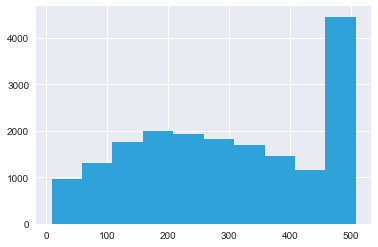

In [202]:
lens.hist()

## Rating別の分布を確認する

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


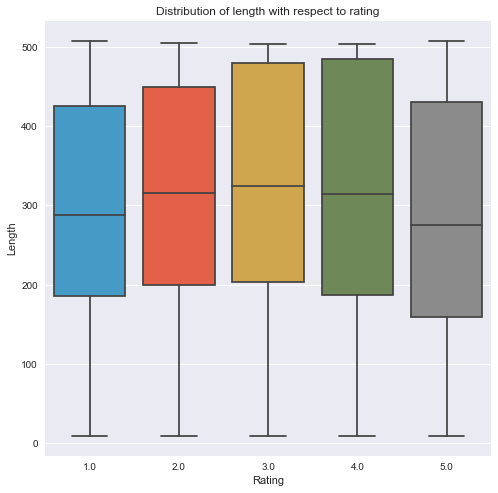

In [203]:
plt.figure(figsize=(8,8))
text['Length']=lens
fx=sns.boxplot(x='Rating',y='Length',data=text)
plt.title("Distribution of length with respect to rating")
plt.xlabel("Rating")
plt.ylabel("Length")

## CVでやったパターン

In [204]:
cv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words = 'english', max_features=5000)
cv.fit(list(train['Review Text'].values.astype('U'))+list(test['Review Text'].values.astype('U')))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [205]:
#X_train=count_vect.transform(train['Review Text'].values.astype('U'))
#X_test=count_vect.transform(test['Review Text'].values.astype('U'))
X_train=cv.transform(train['Review Text'].values.astype('U'))
X_test=cv.transform(test['Review Text'].values.astype('U'))

## ナイーブベイズ分類器

In [206]:
model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Accuracyをだす

In [207]:
print(accuracy_score(y_test, predictions))

0.6043978212628606


## コンフュージョンマトリックスでチェック

In [208]:
conf_matrix=confusion_matrix(y_test,predictions)

[[  47   50   47   13   19]
 [  49   82  120   57   33]
 [  34  100  250  161   61]
 [  14   41  184  405  453]
 [  19   26   91  389 2212]]


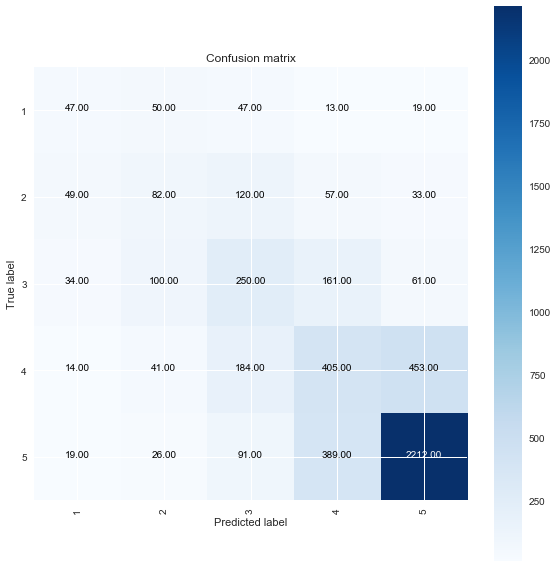

In [209]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(8,8))
plot_confusion_matrix(conf_matrix, classes=['1', '2','3','4','5'],
                      title='Confusion matrix')
plt.show()

# tfidfでのシンプルナイーブベイズ分類

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer

## データセットをtextという変数に入れる

In [221]:
text = dataset[['Review Text','Rating']]
text.shape

(23486, 2)

## 欠損を処理する

In [222]:
text['Review Text'][0]
text[text['Review Text']==""]=np.NaN
text['Review Text'].fillna("No Review",inplace=True)

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

## TrainとTestに分ける

In [223]:
split = np.random.randn(len(text)) <0.8
train = text[split]
test = text[~split]
print("トータルの行数は  train:",len(train),"and test:",len(test))
y_train=train['Rating']
y_test=test['Rating']

トータルの行数は  train: 18448 and test: 5038


## CVでやったパターン

In [224]:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words = 'english', max_features=5000)
vectorizer.fit(list(train['Review Text'].values.astype('U'))+list(test['Review Text'].values.astype('U')))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [ ]:
#terms = vectorizer.get_feature_names()

In [ ]:
#cv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words = 'english', max_features=5000)
#cv.fit(list(train['Review Text'].values.astype('U'))+list(test['Review Text'].values.astype('U')))

In [225]:
X_train=vectorizer.transform(train['Review Text'].values.astype('U'))
X_test=vectorizer.transform(test['Review Text'].values.astype('U'))

## ナイーブベイズ分類器

In [226]:
model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Accuracyをだす

In [227]:
print(accuracy_score(y_test, predictions))

0.6085748312822549


## コンフュージョンマトリックスでチェック

In [228]:
conf_matrix=confusion_matrix(y_test,predictions)

[[   1   11   57   13   91]
 [   0    4  124   51  160]
 [   1    1  170  101  330]
 [   0    1   78  159  887]
 [   0    0   12   54 2732]]


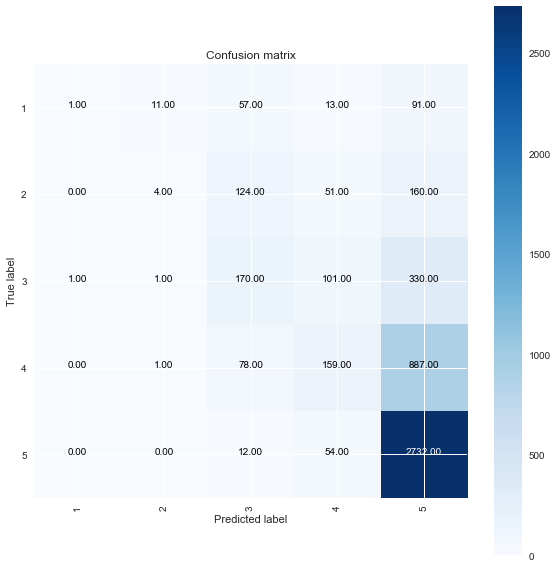

In [229]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(8,8))
plot_confusion_matrix(conf_matrix, classes=['1', '2','3','4','5'],
                      title='Confusion matrix')
plt.show()

# Bad Review の予測

In [210]:
B_dataset = read_csv('./rating_bad.csv')
B_reviews = B_dataset['Review Text'].astype('str')
B_recommend = B_dataset['Recommended IND']

In [211]:
text = B_dataset[['Review Text','Rating']]
text.shape

(2407, 2)

## 欠損を処理する

In [212]:
text['Review Text'][0]
text[text['Review Text']==""]=np.NaN
text['Review Text'].fillna("No Review",inplace=True)

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

## TrainとTestに分ける

In [213]:
split = np.random.randn(len(text)) <0.8
train = text[split]
test = text[~split]
print("トータルの行数は  train:",len(train),"and test:",len(test))
y_train=train['Rating']
y_test=test['Rating']

トータルの行数は  train: 1914 and test: 493


## CVでやる

In [214]:
cv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words = 'english', max_features=1000)
cv.fit(list(train['Review Text'].values.astype('U'))+list(test['Review Text'].values.astype('U')))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)

In [215]:
X_train=cv.transform(train['Review Text'].values.astype('U'))
X_test=cv.transform(test['Review Text'].values.astype('U'))

## ナイーブベイズ分類器

In [216]:
model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Accuracyをだす

In [217]:
print(accuracy_score(y_test, predictions))

0.6470588235294118


## コンフュージョンマトリックスでチェック

In [218]:
conf_matrix=confusion_matrix(y_test,predictions)

[[ 72 105]
 [ 69 247]]


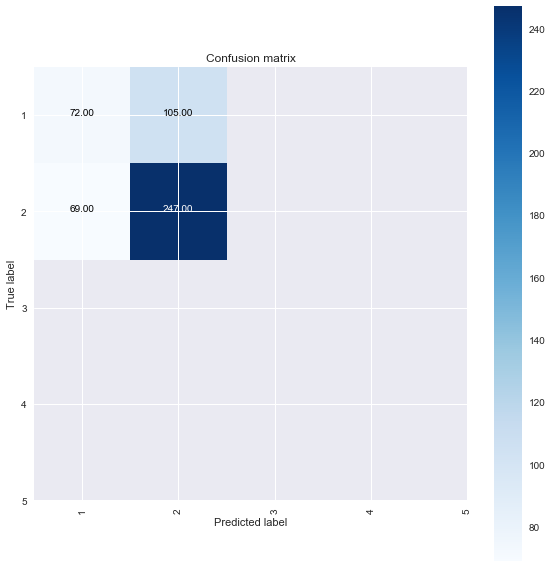

In [219]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(8,8))
plot_confusion_matrix(conf_matrix, classes=['1', '2','3','4','5'],
                      title='Confusion matrix')
plt.show()

## 動詞と形容詞を中心にする

In [269]:
B_reviews.head()

0    3 tags sewn in, 2 small (about 1'' long) and 1...
1    I was really hoping to like this, but it did n...
2    I usually wear a medium and bought a small. it...
3    I was very excited to order this top in red xs...
4    This is so thin and poor quality. especially f...
Name: Review Text, dtype: object

## 正規表現パターンを 正規表現オブジェクト にコンパイル

In [270]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

## Review データの変換をする

In [271]:
def review_prepare(review):
    review = review.lower()# lowercase text
    review = re.sub(REPLACE_BY_SPACE_RE," ",review)# replace REPLACE_BY_SPACE_RE symbols by space in text
    review = re.sub(BAD_SYMBOLS_RE,"",review)# delete symbols which are in BAD_SYMBOLS_RE from text
    review = re.sub(' +',' ',review)
    review = " ".join([word for word in review.split() if word not in STOPWORDS]) # delete stopwords from text
    return review

In [272]:
B_reviews_prepared = [review_prepare(review) for review in B_reviews]

In [273]:
B_reviews_prepared

['3 tags sewn 2 small 1 long 1 huge 2 x 3 itchy cut thread left behind plasticy even itchy make intimates item itchy tags comfortable also love bralettes wear time including work b cup however one thin flimsy gives support even b cup would lounging bralette wasnt itchy',
 'really hoping like look way model least sharkbite hem much pronounced looser one photo looks like pinned back 58 usually wear medium large got medium lot material bottom half photo shows made look bigger flattering material nice weave thin delicate bought holly deep olive blue colors',
 'usually wear medium bought small fit ok shape flattering love baby doll dresses tops tent daughter saw try said thats piece tablecloth going back',
 'excited order top red xs cute huge shapeless support thin go back shouldve looked reviews',
 'thin poor quality especially price felt like thin pajama top buttons terrible little shell buttons could returned faster',
 'title says allthis fabric top best worst part design colors vibrant 

## Stem_Analyzer



In [274]:
def noun_stem_analyzer(string):
    st = nltk.stem.lancaster.LancasterStemmer()
    return [st.stem(word) for word, pos in nltk.pos_tag(nltk.word_tokenize(string)) if pos == "JJ" or pos == "VB"]

In [284]:
#noun_stem_analyzer(str(B_reviews_prepared))

In [287]:
cv = CountVectorizer(analyzer=noun_stem_analyzer, min_df=0.05, max_df=0.86, stop_words="english")
matrix = cv.fit_transform(B_reviews_prepared)
cv.get_feature_names()

['beauty',
 'big',
 'cheap',
 'cut',
 'disappoint',
 'dress',
 'fabr',
 'fit',
 'good',
 'gre',
 'high',
 'hug',
 'larg',
 'littl',
 'lov',
 'much',
 'nic',
 'short',
 'smal',
 'soft',
 'thin',
 'top',
 'wear',
 'wid']

今回は2407文書です。
min_df=120/2407=0.05、

max_df=2045/2407=0.85,

とすると、

出現する文書が120文書以上、2045文書以下くらいの特徴を取ってみたことになります。

中には、Beautyなど、言葉の意味としては、Positiveとして捉えられがちなものも含まれるため、

この方式で、狭めてもそれほど予測精度が上がりにくいのではないかと考えています。

そのため、このBad Reviewだけを扱った、Accuracyの向上はこの辺りでやめにします。




# 自分学習用：文章チェックする（with構文でも）

In [277]:
# with open('./Womens Clothing E-Commerce Reviews.csv', 'r', encoding='UTF-8') as f:
#     print(f.read()[:394])
 

# 自分学習用：CV前処理5 （日本語で使う）

analyzerには好きなものが渡せます。ということは、日本語形態素解析器を突っ込んでやればCountVectorizerは日本語でも使える訳です。pythonの日本語版wikipediaから以下の文章を取ってきました。

In [278]:
# with open("sample.txt", "r") as f:
#     txt = f.read()
# source2_list = [x for x in txt.split("\n") if x != ""]

In [279]:
# import MeCab
# tagger = MeCab.Tagger("")
# def japanese_analyzer(string):
#     result_list = []
#     for line in tagger.parse(string).split("\n"):
#         splited_line = line.split("\t")
#         if len(splited_line) >= 2 and "名詞" in splited_line[1]:
#             result_list.append(splited_line[0])
#     return result_list

日本語形態素解析器にはMeCabを使います。次のようにanalyzerを定義します。

In [280]:
# cv = CountVectorizer(analyzer=japanese_analyzer)
# matrix = cv.fit_transform(source2_list)
# cv.get_feature_names()